In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
import yfinance as yf

In [6]:
df=yf.download('MSFT', start='2015-4-30',end='2020-04-30')

[*********************100%***********************]  1 of 1 completed


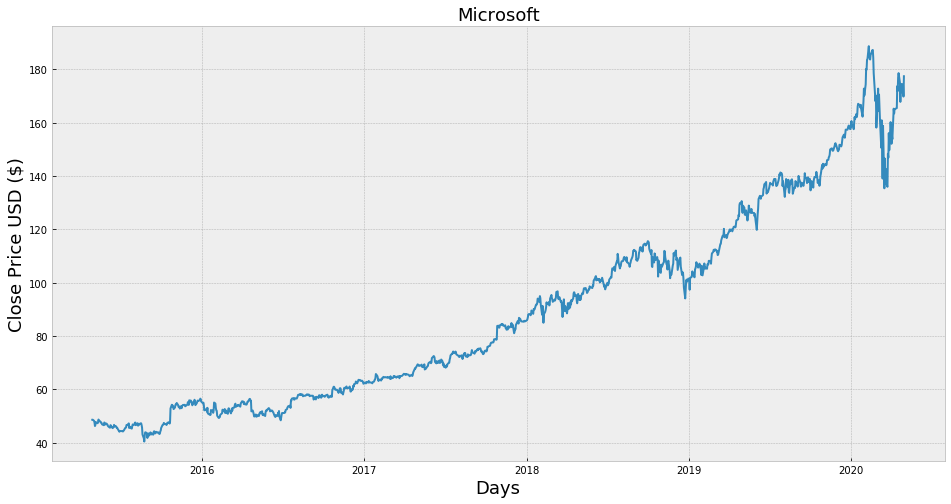

In [7]:
plt.figure(figsize=(16,8))
plt.title('Microsoft', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [8]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (the target or dependent variable) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2020-04-24,172.059998,174.559998,170.710007,174.550003,174.550003,34305300,NaN
2020-04-27,176.589996,176.899994,173.300003,174.050003,174.050003,33194400,NaN
2020-04-28,175.589996,175.669998,169.389999,169.809998,169.809998,34392700,NaN
2020-04-29,173.220001,177.679993,171.880005,177.429993,177.429993,50872900,NaN


In [9]:
# create teh feature dataset
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[4.87000008e+01 4.95400009e+01 4.85999985e+01 4.86399994e+01
  4.38579407e+01 6.47255000e+07]
 [4.85800018e+01 4.88800011e+01 4.84000015e+01 4.86599998e+01
  4.38759842e+01 3.89373000e+07]
 [4.83699989e+01 4.88699989e+01 4.81800003e+01 4.82400017e+01
  4.34972725e+01 3.40395000e+07]
 ...
 [1.46000000e+02 1.47100006e+02 1.35860001e+02 1.37350006e+02
  1.37350006e+02 8.48662000e+07]
 [1.37009995e+02 1.40570007e+02 1.32520004e+02 1.35979996e+02
  1.35979996e+02 7.89752000e+07]
 [1.43750000e+02 1.49600006e+02 1.41270004e+02 1.48339996e+02
  1.48339996e+02 8.25167000e+07]]


In [10]:
# create the target dataset
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 46.13999939  45.72999954  45.65000153 ... 174.05000305 169.80999756
 177.42999268]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [13]:
#Get the feature data

#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]

#Get the last 'x' rows
x_future = x_future.tail(future_days) 

#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[1.88059998e+02, 1.88179993e+02, 1.86470001e+02, 1.87279999e+02,
        1.87279999e+02, 2.99975000e+07],
       [1.86949997e+02, 1.87250000e+02, 1.81100006e+02, 1.84419998e+02,
        1.84419998e+02, 3.68624000e+07],
       [1.83169998e+02, 1.83500000e+02, 1.77250000e+02, 1.78589996e+02,
        1.78589996e+02, 4.85726000e+07],
       [1.67770004e+02, 1.74550003e+02, 1.63229996e+02, 1.70889999e+02,
        1.70889999e+02, 6.83111000e+07],
       [1.74199997e+02, 1.74839996e+02, 1.67649994e+02, 1.68070007e+02,
        1.68070007e+02, 6.80733000e+07],
       [1.69710007e+02, 1.73259995e+02, 1.68210007e+02, 1.70169998e+02,
        1.70169998e+02, 5.62061000e+07],
       [1.63320007e+02, 1.67029999e+02, 1.57979996e+02, 1.58179993e+02,
        1.58179993e+02, 9.31749000e+07],
       [1.52410004e+02, 1.63710007e+02, 1.52000000e+02, 1.62009995e+02,
        1.62009995e+02, 9.70736000e+07],
       [1.65309998e+02, 1.72919998e+02, 1.62309998e+02, 1.72789993e+02,
        1.72789993e+02, 

In [15]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[146.91999817 156.11000061 149.69999695 160.22999573 157.71000671
 160.91999817 155.25999451 153.83000183 165.27000427 157.71000671
 160.22999573 165.13999939 165.50999451 173.69999695 171.88000488
 177.03999329 178.6000061  175.05999756 167.82000732 173.52000427
 171.41999817 174.55000305 174.05000305 144.61000061 177.42999268]

[185.22030245 180.98847091 178.92233691 173.96880277 172.82128298
 175.850838   169.27653367 169.8936969  173.17428982 169.31096246
 171.78363066 176.12408446 162.98322197 167.3172823  162.4045547
 161.13278653 161.07607795 163.24225659 160.00682872 154.24406497
 156.85948183 159.38891557 151.45710765 151.10141154 158.08789895]


C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


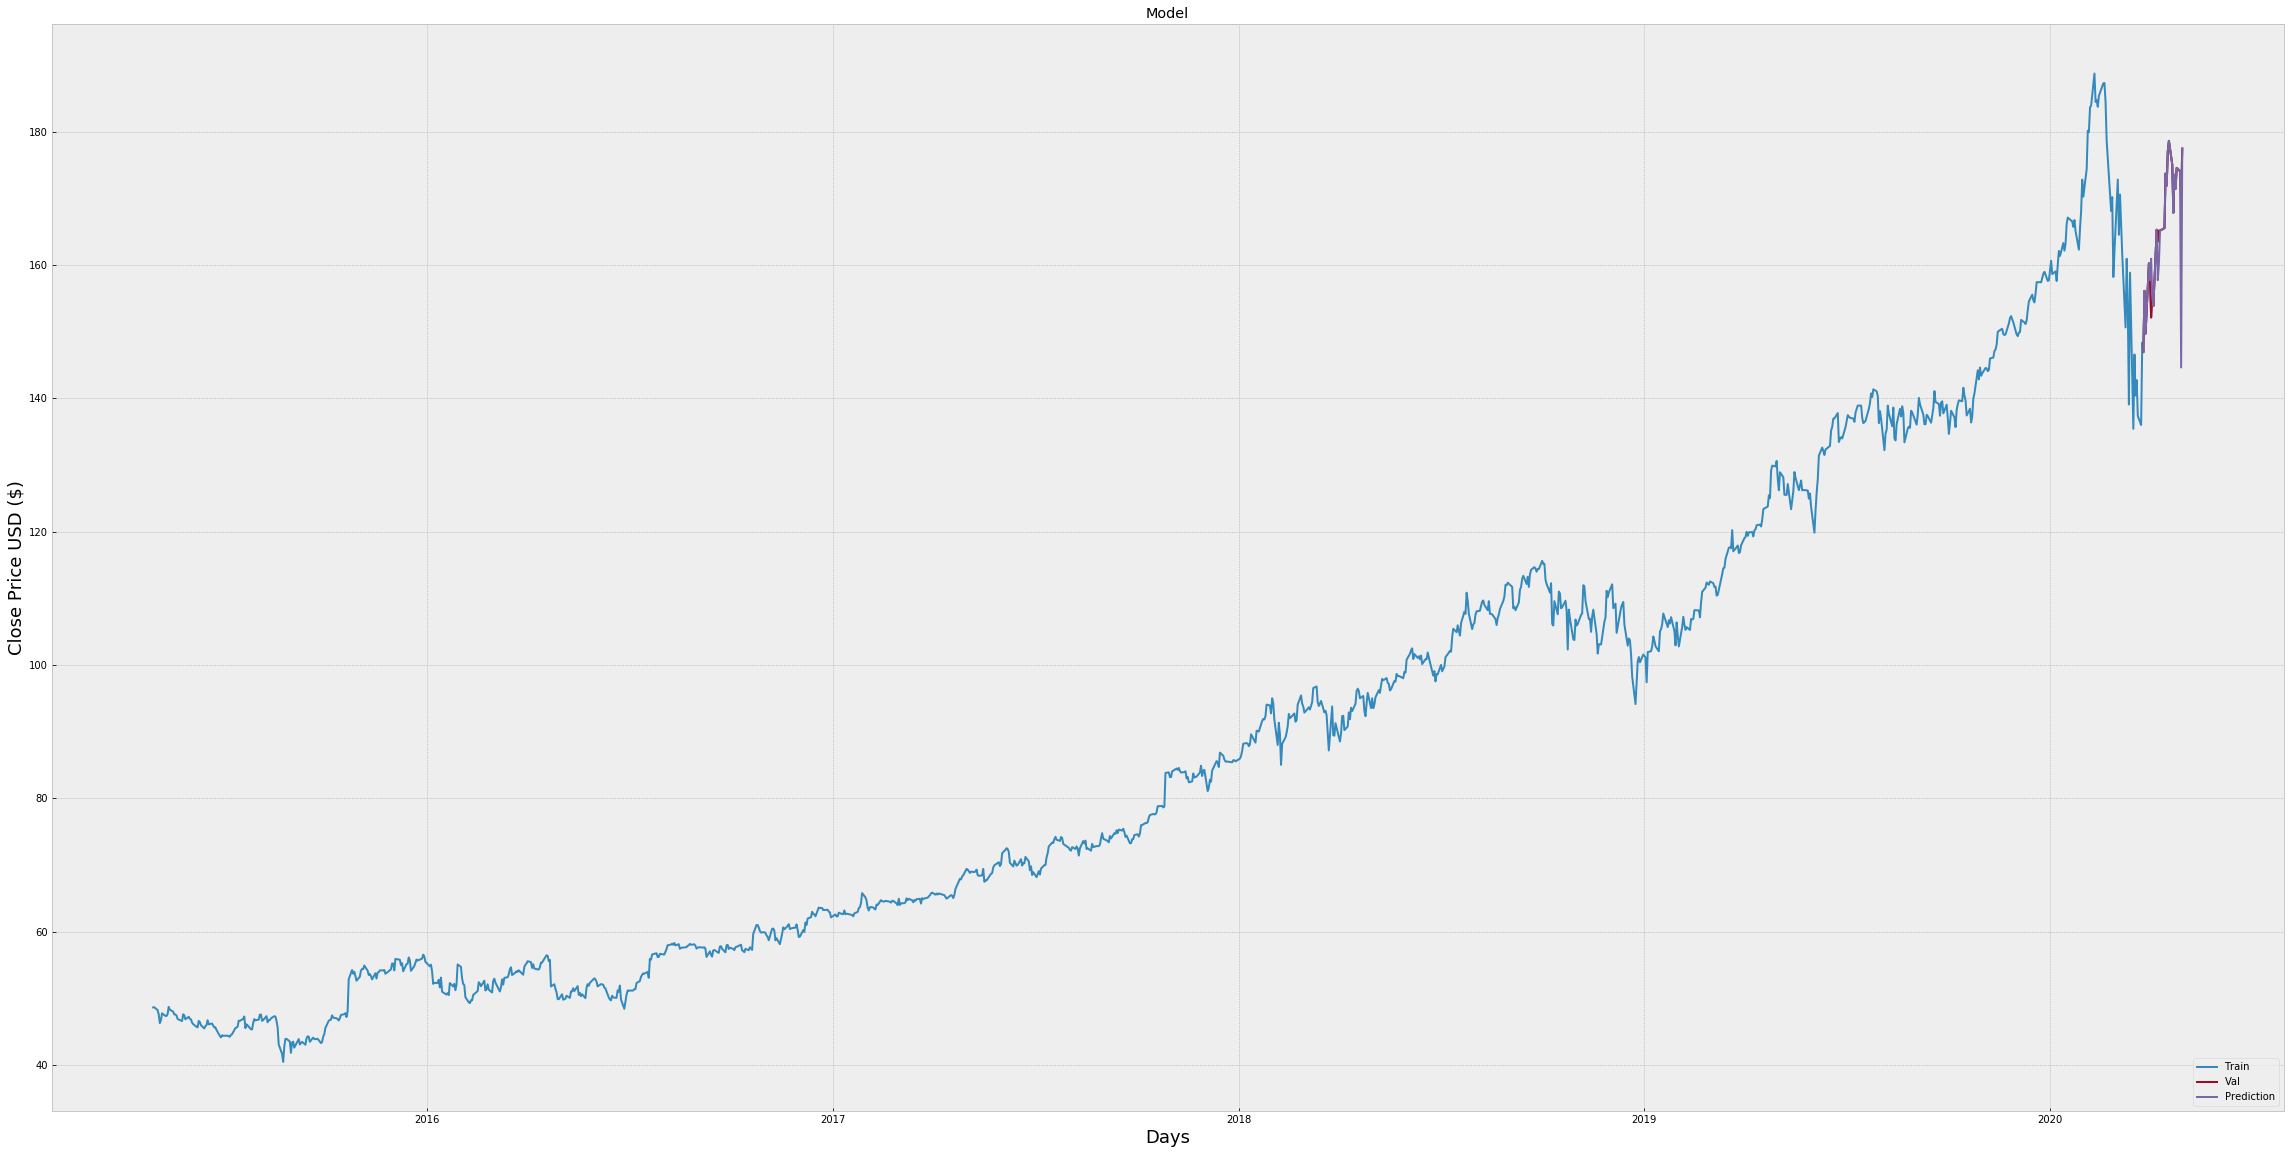

In [20]:
#Visualize the data
predictions = tree_prediction

#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(40,20))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()